In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
import json
import os
from IPython.display import Image
from IPython.display import clear_output

In [3]:
metas_not_marked_paths = []

for file in glob.glob('../hubble/meta/*.json'):
    with open(file, 'r', encoding='utf8') as mf:
        try:
            meta = json.load(mf)

            if not 'is_good' in meta:
                metas_not_marked_paths.append(file)
        except:
            print('failed', file)

print('Number of images not marked: {}'.format(str(len(metas_not_marked_paths))))

failed ../hubble/meta/1.json
Number of images not marked: 1877


365


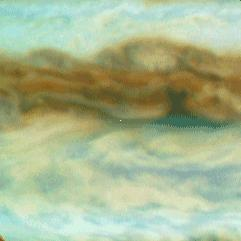

In [ ]:
import random

for x in range(2000):
    file = random.choice(metas_not_marked_paths)
    with open(file, 'r', encoding='utf8') as mf:
        meta = json.load(mf)
    print(meta['id'])
    if 'is_good' in meta:
        continue
    try:
        display(Image(filename='../hubble/jpgs/{}.jpg'.format(meta['id']), width = 300, height = 300))
        
        response = input('Is it good?')
        
        meta['is_good'] = response
        
        with open(file, 'w', encoding = 'utf-8') as file:
            json.dump(meta, file)
    except: 
        continue
    clear_output()

# 